## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
start_time = time.time()

In [2]:
import dendrotweaks as dd
dd.__version__

'0.5.0'

In [3]:
dd.apply_dark_theme()

In [4]:
import os
path_to_model = os.getcwd()
path_to_data = os.path.dirname(path_to_model)

In [5]:
model = dd.Model(path_to_model)

## Load model components

In [6]:
model.list_morphologies()

['original', 'main', 'main_block_na', 'main_reduced_apic']

In [7]:
model.load_morphology(file_name='main')

Sorted PointTree(root=Point(idx=0), num_nodes=2214).
Apical dendrite is already aligned.
Extended 44 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=2258).


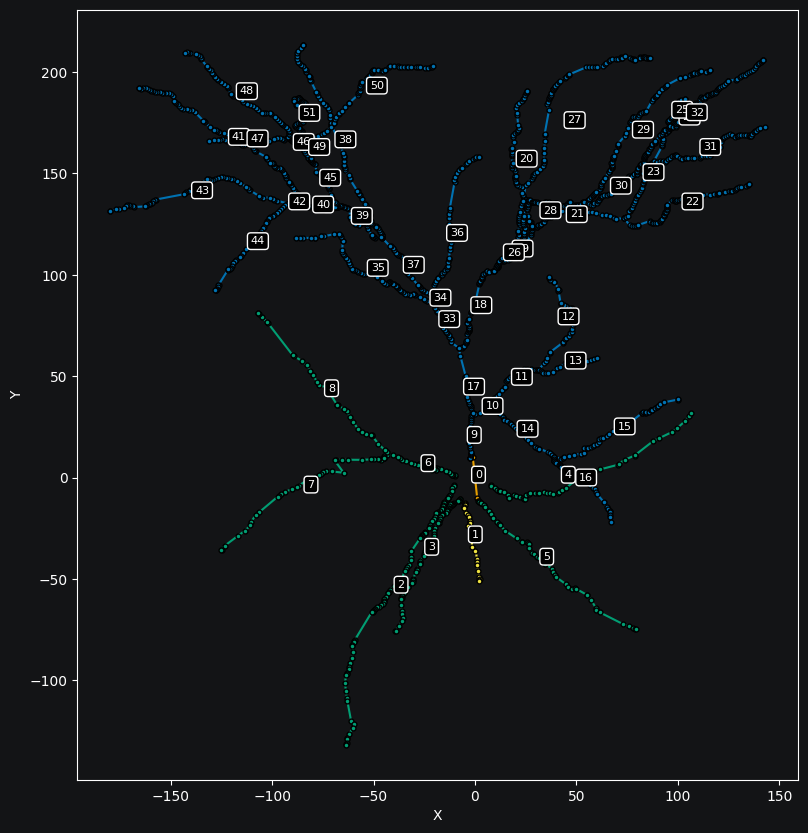

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

In [9]:
model.list_biophys()

['main', 'main_reduced_apic']

In [10]:
model.load_biophys('main')

Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/KCa.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/Kv.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/CaHVA.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/Km.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/CaLVA.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/Na.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/Ka.py


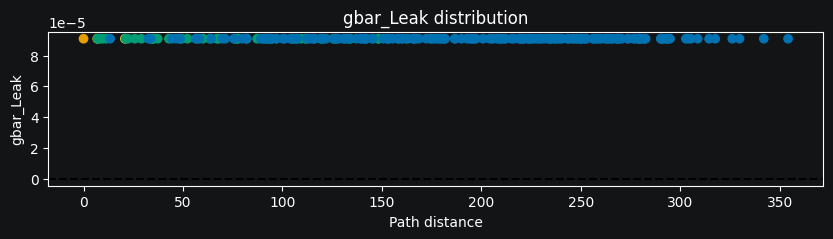

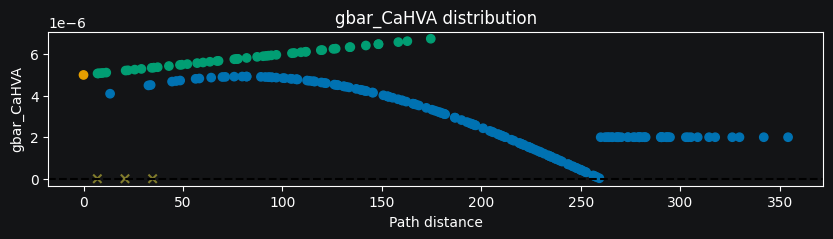

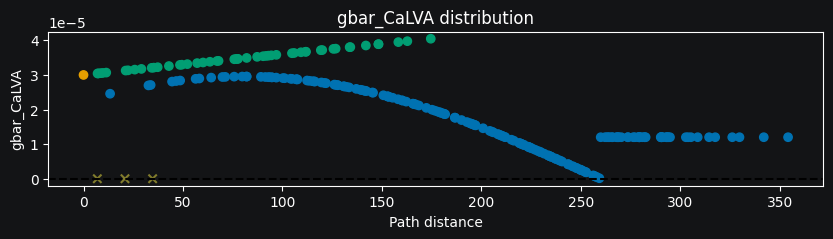

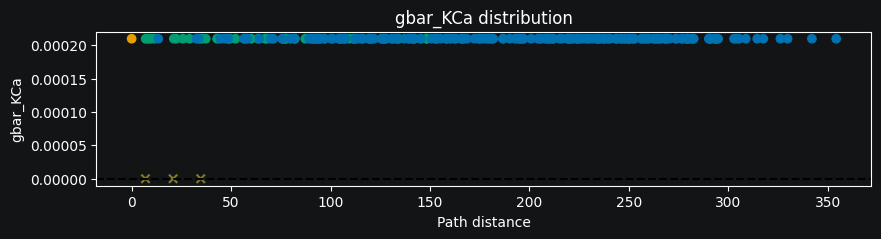

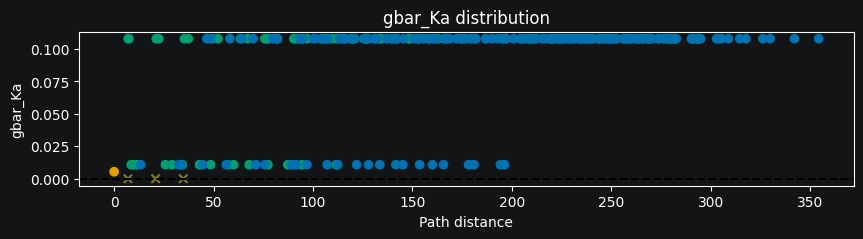

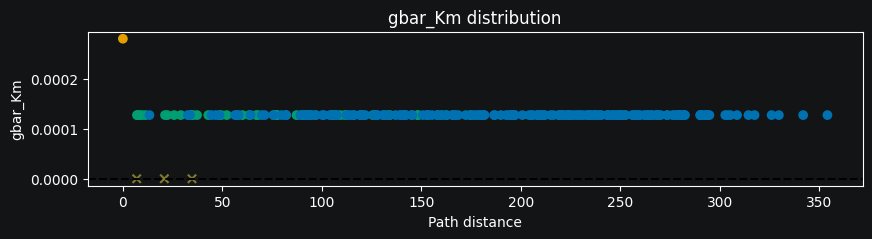

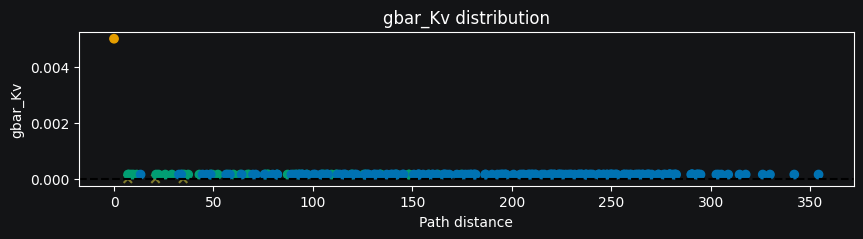

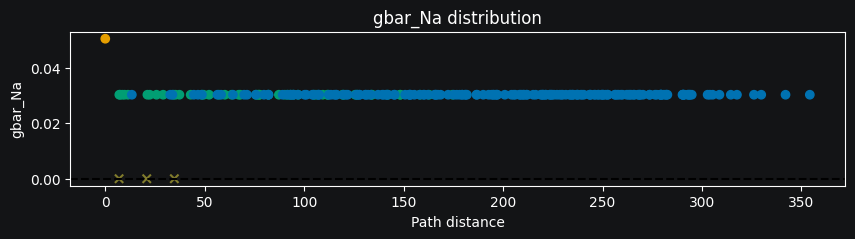

In [11]:
for param_name in model.conductances:
    fig, ax = plt.subplots(figsize=(10, 2))
    model.plot_param(param_name, ax=ax)

## Reduce apical subtree

In [12]:
root = model.get_sections(lambda sec: sec.domain_name == 'apic' and sec.parent.domain_name == 'soma')[0]
print(root.domain_name, root.parent.domain_name)

apic soma


<Axes: title={'center': 'Radius Distribution - Section 9 (apic)'}, xlabel='Distance (µm)', ylabel='Radius (µm)'>

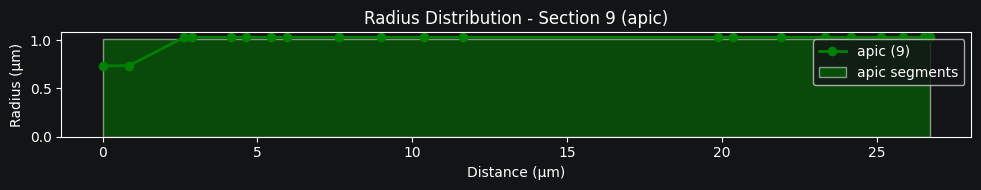

In [13]:
fig, ax = plt.subplots(figsize=(10, 2))
root.plot_radii(ax=ax)

In [14]:
data = model.reduce_subtree(root, fit=True)

CableParams(length=764.4908970856915, diam=2.5167725013613853, space_const=831.9329527518314, cm=2.0, rm=11000.0, ra=100.0, e_pas=-79.0, electrotonic_length=0.9189333041285863)
Sorted SectionTree(root=NeuronSection(idx=0), num_nodes=45).
Sorted PointTree(root=Point(idx=0), num_nodes=2048).
Sorted SegmentTree(root=NeuronSegment(idx=0), num_nodes=219).
Sorted SegmentTree(root=NeuronSegment(idx=0), num_nodes=62).
Sorted PointTree(root=Point(idx=0), num_nodes=396).
Interpolated for ids []


(model.py, line 555)
(model.py, line 922)
(model.py, line 555)
(model.py, line 555)


In [15]:
# # Fit distributions to data for the group
# group_name = 'apical'
# segments = model.get_segments(group_names=[group_name])
# for param_name in model.params:
#     model.fit_distribution(param_name, segments=segments, plot=True)

## Inspect the reduced model

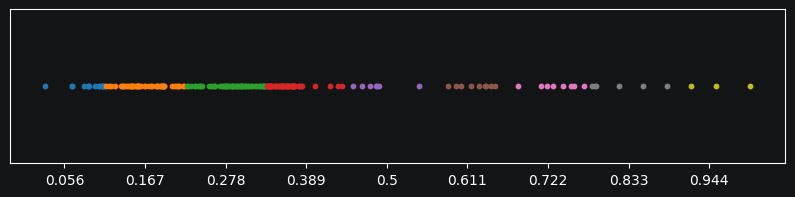

In [16]:
segs_to_reduced_segs = data['segs_to_reduced_segs']
segs_to_locs = data['segs_to_locs']
fig, ax = plt.subplots(figsize=(10, 2))
reduced_segs = root.segments
reduced_seg_to_color = {seg: plt.cm.tab10.colors[i] for i, seg in enumerate(reduced_segs)}
ax.set_ylim(-1, 1)
for seg, loc in segs_to_locs.items():
    plt.scatter(loc, [0], s=10, color=reduced_seg_to_color[segs_to_reduced_segs[seg]])

norm_centers = np.round(np.array(root.seg_centers)/root.L, 3)
ax.set_xticks(norm_centers);
ax.set_xticklabels(norm_centers);
ax.set_yticks([]);

<Axes: title={'center': 'Radius Distribution - Section 9 (reduced_80)'}, xlabel='Distance (µm)', ylabel='Radius (µm)'>

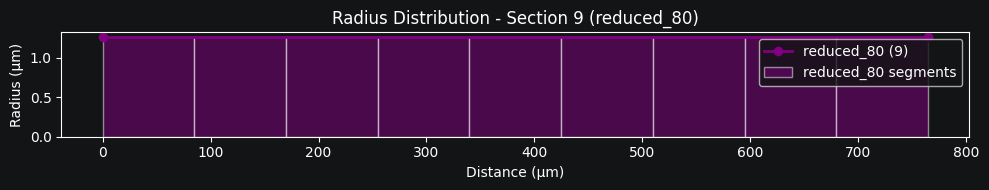

In [17]:
fig, ax = plt.subplots(figsize=(10, 2))
root.plot_radii(ax=ax)

In [18]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 2}
1,Independent,cm,somatic,constant,{'value': 1}
2,Independent,cm,reduced_80,constant,{'value': 2.0}
3,Independent,Ra,all,constant,{'value': 100}
4,Independent,Ra,reduced_80,constant,{'value': 100.0}
...,...,...,...,...,...
81,Na,qh_Na,reduced_80,constant,{'value': 5.0}
82,Na,v12hinf_Na,all,constant,{'value': -60}
83,Na,v12hinf_Na,reduced_80,constant,{'value': -60.0}
84,Na,qhinf_Na,all,constant,{'value': 6.2}


In [19]:
model.domains_to_mechs

{'axon': {'Leak'},
 'dend': {'CaDyn', 'CaHVA', 'CaLVA', 'KCa', 'Ka', 'Km', 'Kv', 'Leak', 'Na'},
 'soma': {'CaDyn', 'CaHVA', 'CaLVA', 'KCa', 'Ka', 'Km', 'Kv', 'Leak', 'Na'},
 'reduced_80': {'CaDyn',
  'CaHVA',
  'CaLVA',
  'KCa',
  'Ka',
  'Km',
  'Kv',
  'Leak',
  'Na'}}

In [20]:
model.groups

{'all': SegmentGroup("all", domains=['axon', 'dend', 'soma', 'reduced_80']),
 'axonal': SegmentGroup("axonal", domains=['axon']),
 'dendritic': SegmentGroup("dendritic", domains=['dend']),
 'somatic': SegmentGroup("somatic", domains=['soma']),
 'dendritic_thin': SegmentGroup("dendritic_thin", domains=['dend'], section_diam(None, 0.8)),
 'dendritic_thick': SegmentGroup("dendritic_thick", domains=['dend'], section_diam(0.8, None)),
 'basal': SegmentGroup("basal", domains=['dend']),
 'reduced_80': SegmentGroup("reduced_80", domains=['reduced_80'])}

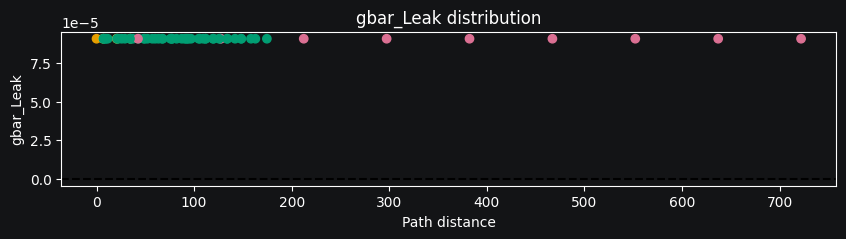

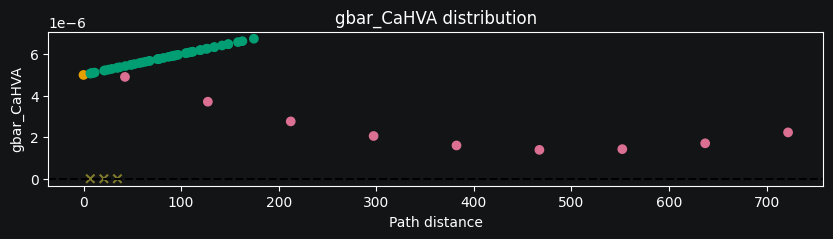

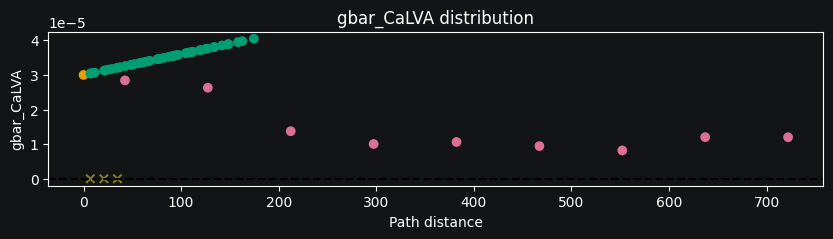

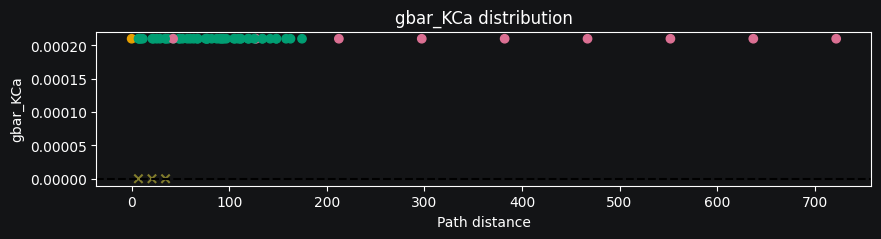

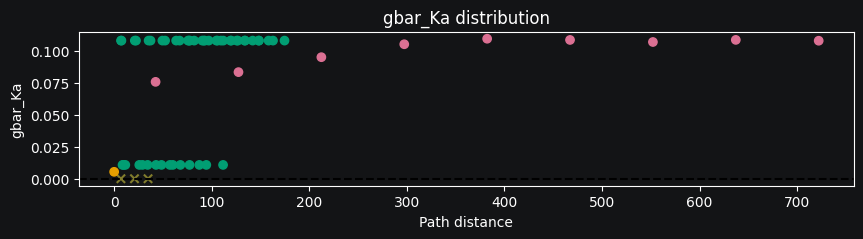

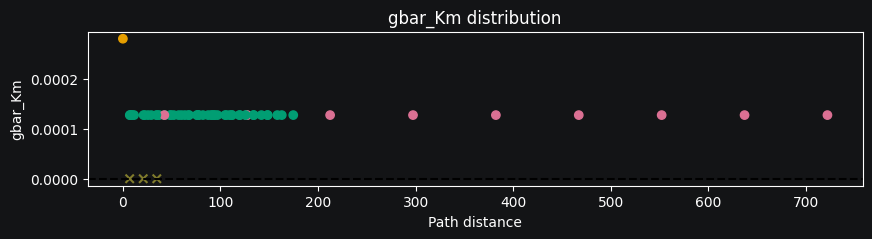

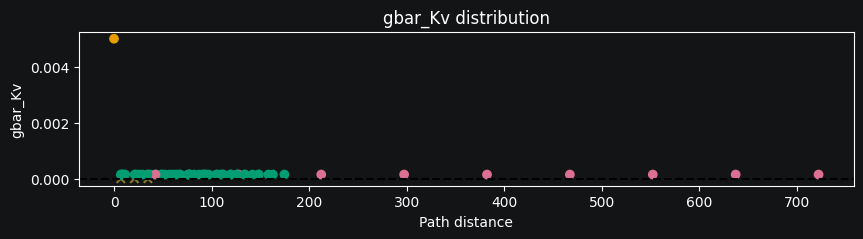

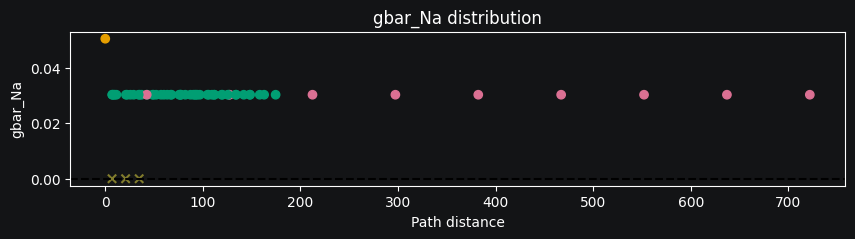

In [21]:
for param_name in model.conductances:
    fig, ax = plt.subplots(figsize=(10, 2))
    model.plot_param(param_name, ax=ax)

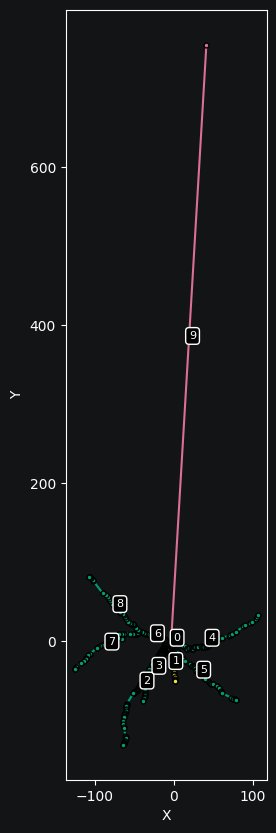

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

In [23]:
model.export_morphology(file_name='main_reduced_apic')

Removed 2 overlapping nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=394).
Extended 2 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=396).


## Run simulation

In [24]:
model.list_stimuli()

['current_soma_depol',
 'current_soma_depol_block_na',
 'current_dend_hyperpol_attenuation',
 'syn_apic_50_ampa',
 'current_soma_hyperpol']

In [25]:
soma = model.sec_tree.soma
model.load_stimuli('current_soma_depol')

In [26]:
model.iclamps[soma(0.5)].amp= 0.172

In [27]:
model.run(1000)

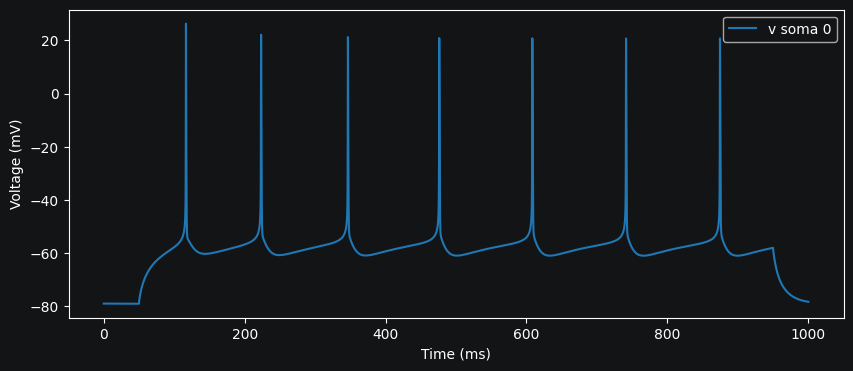

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
model.simulator.plot_voltage(ax=ax)

In [29]:
model.export_biophys(file_name='main_reduced_apic')

In [30]:
model.export_to_NEURON(file_name='Park_2019_reduced_NEURON', include_kinetic_params=True)

## Distribution fitting example

In [31]:
xs = [seg.path_distance() for seg in root.segments]
ys = [seg.get_param_value('gbar_CaLVA') for seg in root.segments]

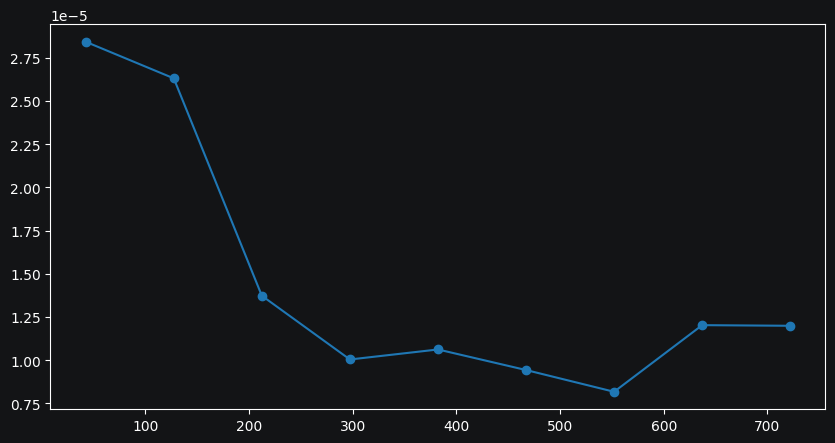

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(xs, ys, 'o-')

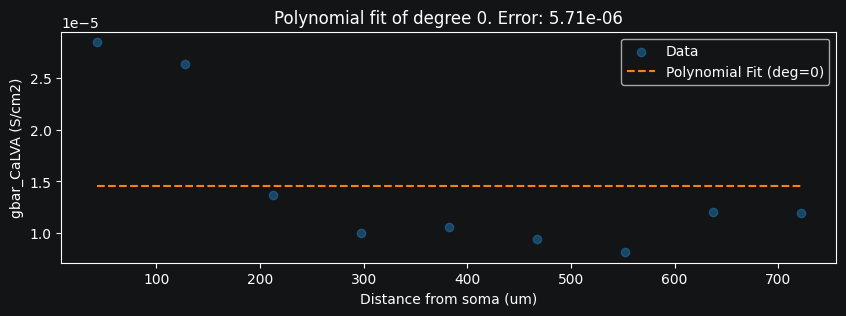

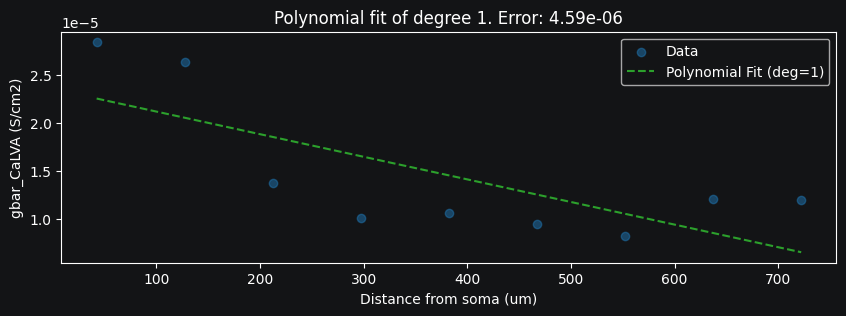

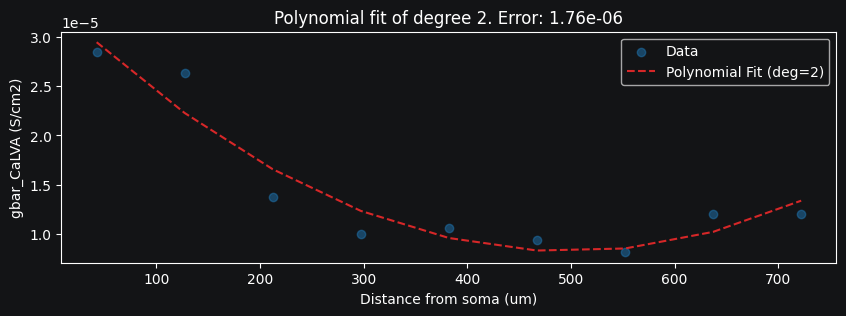

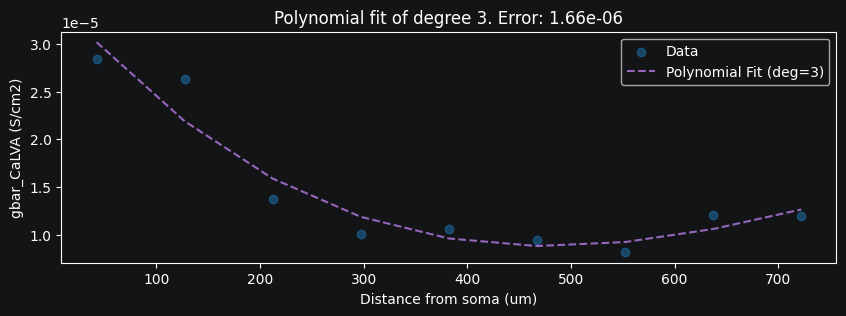

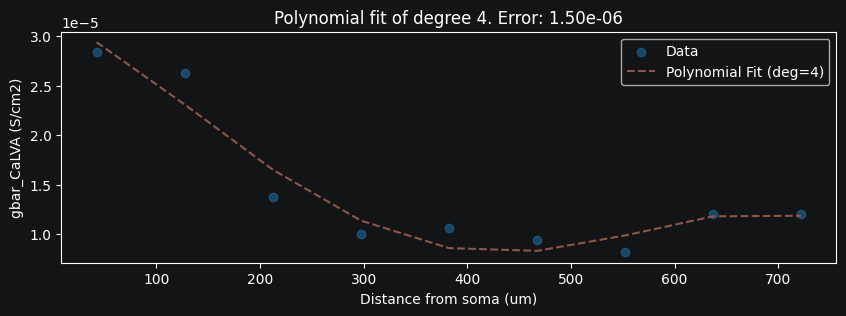

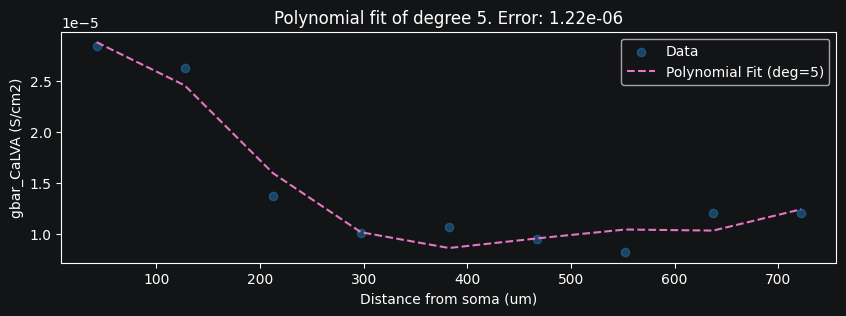

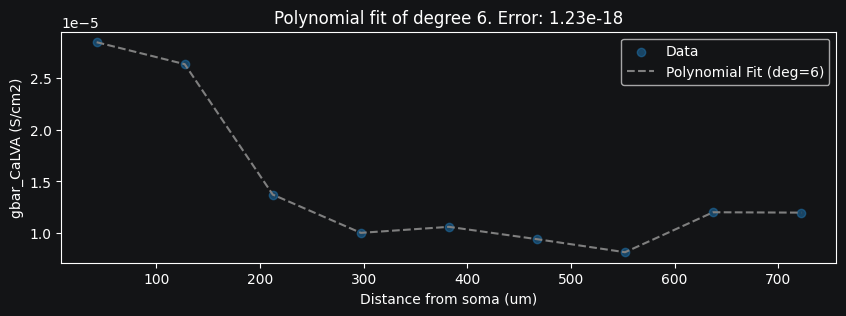

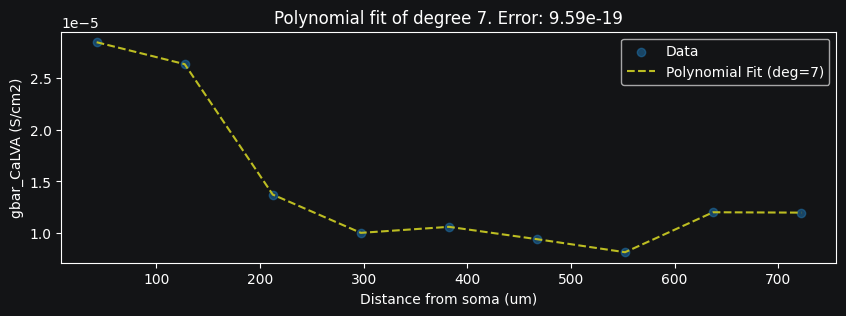

In [33]:
# Fit a polynomial of degree 4
degrees = np.arange(0, 8)
errors = []
fits = []
for degree in degrees:
    coeffs = np.polyfit(xs, ys, degree)
    ys_fit = np.polyval(coeffs, xs)
    error = np.mean(np.abs(ys - ys_fit))
    errors.append(error)
    fits.append(ys_fit)
# degree = 6
# coeffs = np.polyfit(xs, ys, degree)

# Generate fitted curve
# ys_fit = np.polyval(coeffs, xs)

# Plot
for i, degree in enumerate(degrees):
    plt.figure(figsize=(10, 3))
    plt.scatter(xs, ys, label="Data", alpha=0.5)
# plt.plot(xs, ys_fit, color='red', label=f"Polynomial Fit (deg={degree})")
    plt.plot(xs, fits[i], label=f"Polynomial Fit (deg={degree})", color=plt.cm.tab10.colors[i+1], linestyle='--')
    plt.legend()
    plt.title(f"Polynomial fit of degree {degree}. Error: {errors[i]:.2e}")
    plt.xlabel("Distance from soma (um)")
    plt.ylabel("gbar_CaLVA (S/cm2)")



In [34]:
end_time = time.time()
print(f"Total execution time: {end_time - start_time:.2f} seconds")
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

Total execution time: 12.41 seconds
2025-12-07 11:35:29
